In [15]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2



In [88]:
# Asegúrate de tener la ruta correcta y el nombre del archivo
ruta_archivo = 'C:/Users/yourk/Documents/8QT/AI/loan_data_ANN.xlsx'

# Cargar el archivo de Excel en un DataFrame
df = pd.read_excel(ruta_archivo)

# Mostrar los nombres de las columnas
print("Nombres de las columnas en el DataFrame:")
print(df.columns.tolist())

# Dividir los datos en entrenamiento y prueba
datos_entrenamiento = df.iloc[599:3000]  # Filas del 600 al 1200 para entrenamiento
datos_prueba = pd.concat([df.iloc[:599], df.iloc[3000:]])  # El resto para pruebas

Nombres de las columnas en el DataFrame:
['credit.policy', 'installment', 'fully.paid']


In [89]:
# Separa las características y las etiquetas
X_train = datos_entrenamiento.drop('installment', axis=1)
y_train = datos_entrenamiento['fully.paid']
X_test = datos_prueba.drop('installment', axis=1)
y_test = datos_prueba['fully.paid']

# Normalización de los datos (importante para el entrenamiento de redes neuronales)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [90]:
model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',  
    metrics=['accuracy']  
)


# Configuración de Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.01,
    patience=50,
    verbose=1,
    restore_best_weights=True
)


C:\Users\yourk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [92]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose = False
)

Epoch 108: early stopping
Restoring model weights from the end of the best epoch: 58.


In [93]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy * 100:.2f}%")




225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - accuracy: 1.0000 - loss: 0.0148
Loss: 0.014983045868575573
Accuracy: 100.00%


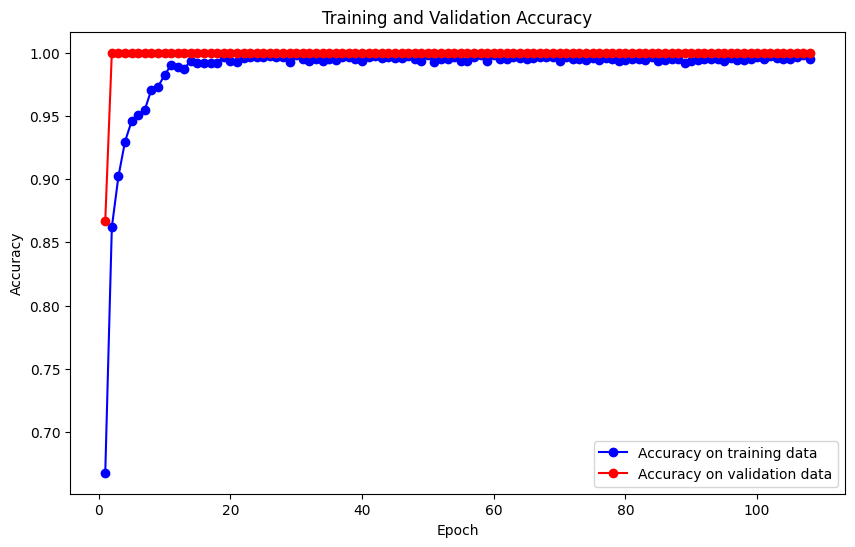

In [94]:
# Extraer la precisión de entrenamiento y validación de la historia del entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Crear rangos de época desde 0 hasta la cantidad de épocas corridas
epochs = range(1, len(acc) + 1)

# Crear una gráfica de líneas para la precisión
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo-', label='Accuracy on training data')
plt.plot(epochs, val_acc, 'ro-', label='Accuracy on validation data')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()